<a href="https://colab.research.google.com/github/Jeff-The-Land-Shark/hands-on-sessions-/blob/main/1_Encoding_Categorical_Features_in_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Encoding Categorical Data***

## 📚 **Towards Better Documentation Reading**

Encoding techniques are essential for preprocessing categorical data in machine learning. This notebook demonstrates how to use scikit-learn's tools for encoding, with a focus on **Label Encoding** and **One-Hot Encoding**.

### 🔗 **Libraries Overview**
- **[scikit-learn](https://scikit-learn.org/stable/)**: A Python library for machine learning, offering tools for preprocessing, modeling, and evaluation.
- **[NumPy](https://numpy.org/)**: A fundamental library for numerical computing, supporting arrays and matrices.

## **1️⃣ Label Encoding with `LabelEncoder`**
Label Encoding converts categories into integers, assigning a unique number to each category.

```python
from sklearn.preprocessing import LabelEncoder

categories = ['apple', 'banana', 'cherry', 'apple']
le = LabelEncoder()
encoded_labels = le.fit_transform(categories)

print("Encoded labels:", encoded_labels)
```

## **2️⃣ One-Hot Encoding with `OneHotEncoder`**
One-Hot Encoding represents categories as binary vectors.

```python
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categories = np.array([['apple'], ['banana'], ['cherry'], ['apple']])
ohe = OneHotEncoder()
one_hot_encoded = ohe.fit_transform(categories)

print("One-hot encoded matrix:\n", one_hot_encoded.toarray())
```

For more details, refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features). Happy coding! 🚀✨


# **Quick Recap on Encoding Techniques**

[![YouTube Video](https://img.youtube.com/vi/G2iVj7WKDFk/0.jpg)](https://youtu.be/G2iVj7WKDFk?si=w8Uq14pRMZb-Mu4a)


# **Categorical Encoding in Machine Learning**

A structured dataset typically includes a mix of numerical and categorical variables. Machine learning algorithms can only process numerical data, not text. This is where **categorical encoding** comes into play.


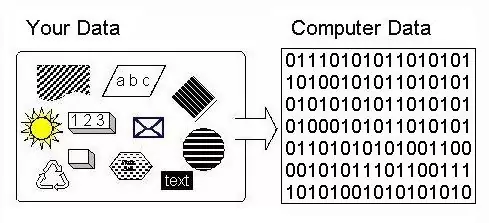


# Fetch the data

This dataset is taken from [this kaggle dataset card](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval). The first step is to import this dataset into our runtime.


*learn more about Kaggle https://www.kaggle.com/  , reach out for any help if you would like to join a contest.*

In [ ]:
import kagglehub

path = kagglehub.dataset_download("rishikeshkonapure/home-loan-approval")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 19.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rishikeshkonapure/home-loan-approval/versions/1


# Load the dataset (training file)

In [ ]:
import pandas as pd

home_loan_prediction = pd.read_csv(path + "/loan_sanction_train.csv")
home_loan_prediction

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Select categorical features

In [ ]:
home_loan_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
categorical_features = home_loan_prediction.select_dtypes(include=['object']).columns.tolist()

categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
unique_values_of_property_area = home_loan_prediction['Property_Area'].unique()
unique_values_of_property_area

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

# **Different Approaches to Categorical Encoding**

So, how should we handle categorical variables? There are several methods, but this article will focus on the two most widely used techniques:

- **Label Encoding**
- **One-Hot Encoding (OHE)**

These techniques are essential for preparing your categorical data for machine learning models, ensuring they can learn and make predictions accurately.


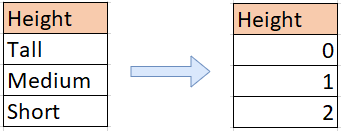


Your task is to map Urban', 'Rural', 'Semiurban'  to thier corresponding labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # initialize the label encoder class
label_encoded_column = label_encoder.fit_transform(home_loan_prediction['Property_Area'])
print(label_encoded_column)

[2 0 2 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 0 2 2 2 1 0 1 1 1 2 2 1 2 2 0 1 0 2 2
 1 2 1 2 2 2 1 2 2 2 2 2 1 1 1 1 2 2 1 1 0 2 2 2 2 0 0 1 1 2 2 2 1 2 1 1 1
 1 2 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2 2 0 2 1 2
 1 0 1 1 0 1 2 0 2 0 1 1 1 0 0 0 0 2 0 2 2 1 1 1 1 0 2 1 0 0 2 1 1 2 1 2 2
 0 1 0 0 2 0 2 1 0 2 0 1 1 2 1 0 2 0 0 0 1 1 0 2 0 1 1 0 0 1 1 2 2 0 1 1 1
 1 0 0 0 0 0 1 2 1 0 1 0 2 1 2 1 1 2 2 1 1 2 0 2 1 1 1 2 0 2 1 0 1 1 1 2 1
 1 1 1 0 2 1 1 0 1 0 0 1 1 0 2 2 0 1 0 2 2 0 1 2 2 2 1 2 1 2 0 1 2 0 0 2 0
 1 2 1 1 0 1 0 1 2 0 2 2 2 0 1 1 1 1 2 1 0 2 1 2 2 0 0 1 0 1 0 0 1 2 2 1 2
 1 2 0 2 2 1 0 2 0 2 0 2 0 0 1 1 0 0 0 2 1 2 1 0 1 1 0 0 0 0 0 1 2 2 2 1 2
 2 2 1 0 0 2 1 0 0 2 1 0 1 0 2 1 0 1 0 0 0 1 2 0 2 2 1 1 1 2 2 0 0 1 0 1 0
 1 1 0 2 2 2 0 1 2 2 1 1 2 2 2 2 1 2 2 0 0 0 2 1 2 1 2 2 0 1 2 0 1 1 0 1 2
 0 1 0 1 2 0 0 1 2 2 2 0 1 0 2 2 2 1 0 0 1 0 2 1 0 1 1 2 1 1 2 2 0 1 0 1 1
 0 0 0 0 0 1 0 2 0 0 1 1 2 2 0 1 1 2 0 1 1 0 2 1 1 2 1 0 1 2 0 0 1 1 1 2 0
 0 1 1 1 0 0 2 1 2 1 2 0 

In this code, the `LabelEncoder` from `sklearn.preprocessing` is used to transform the categorical values in the `Property_Area` column of the `home_loan_prediction` dataset into numerical values.

- `LabelEncoder()` initializes the label encoder class.
- `fit_transform()` learns the unique categories and converts them into integer values.
- `label_encoded_column` contains the transformed numerical representation of the `Property_Area` column.

This process is useful when preparing categorical data for machine learning models that require numerical input.

# TODO: In this cell, try to examine the dimension of `label_encoded_column`, compare it with the number of examples in the dataset.


In [ ]:
#DO here

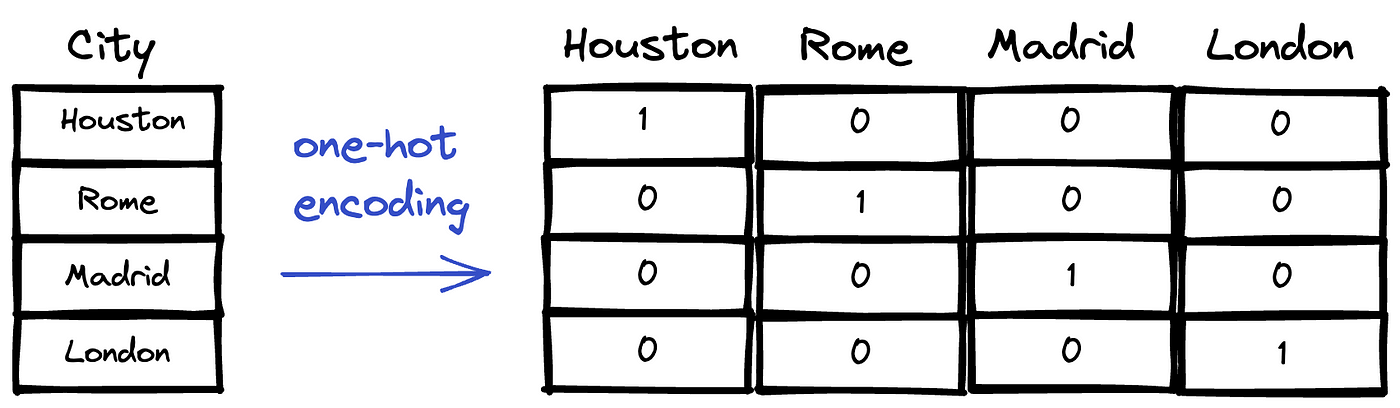

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoder = ColumnTransformer(
    [('one_hot', OneHotEncoder(), ['Property_Area'])],
    remainder='drop'
)

one_hot_encoded_column = one_hot_encoder.fit_transform(home_loan_prediction)
print(one_hot_encoded_column)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


This code demonstrates how to use `OneHotEncoder` from `sklearn.preprocessing` to encode the categorical `Property_Area` column into a binary matrix.

- `OneHotEncoder()`: Converts each category in the `Property_Area` column into a binary vector, where each category is represented as a separate column with a value of `1` for the presence of the category and `0` otherwise.
- `ColumnTransformer()`: Allows us to apply transformations to specific columns in the dataset while leaving others unchanged. Here:
  - `('one_hot', OneHotEncoder(), ['Property_Area'])`: Specifies that the `OneHotEncoder` should be applied to the `Property_Area` column.
  - `remainder='drop'`: Drops all other columns in the dataset, keeping only the transformed column.

The result, `one_hot_encoded_column`, contains a sparse matrix where each row corresponds to a binary encoding of the `Property_Area` values. This technique is particularly useful for machine learning models that require numerical input without assuming any order in categorical data.

# TODO: Now examine the shape of the encoded column. What do you think about it?

<span style="color:red">Discuss a possible drawback and a possible pro for this approach.</span>


In [ ]:
#DO here

In [ ]:
ordinal_mapping = {"Urban": 0, "Rural": 1, "Semiurban": 2} # assumed hierarchy
ordinal_encoded_column  = home_loan_prediction['Property_Area'].map(ordinal_mapping)
ordinal_encoded_column

,Property_Area
0,0
1,1
2,0
3,0
4,0
...,...
609,1
610,1
611,0
612,0


In [ ]:
import numpy as np
target_encoding = home_loan_prediction.groupby('Property_Area')['Loan_Amount_Term'].mean().to_dict()
target_encoded_column = home_loan_prediction['Property_Area'].map(target_encoding)
target_encoded_column

,Property_Area
0,332.800000
1,345.531429
2,332.800000
3,332.800000
4,332.800000
...,...
609,345.531429
610,345.531429
611,332.800000
612,332.800000


# **Further Reading on Categorical Encoding (optional)**

To deepen your understanding of categorical encoding techniques in machine learning, consider exploring the following resources:

- **"Categorical Data Encoding Techniques in Machine Learning"** by GeeksforGeeks: This article provides an overview of various encoding methods, including label encoding, one-hot encoding, and ordinal encoding, along with their applications.

- **"Categorical Data Encoding: 7 Effective Techniques"** by Data Science Dojo: This blog post discusses seven encoding techniques, such as binary encoding and effect encoding, offering insights into their advantages and use cases.

- **"The Complete Guide to Encoding Categorical Features"** by Inside Algorithms: This comprehensive guide covers various encoding techniques, including label encoding, one-hot encoding, and binary encoding, with detailed explanations and code implementations.


## Learning the Best Encoding Mapping

Wanna take it one more step (optional): skim how we can let the model learn the best encoding mapping.

### Pre-requisites:
- **Solid understanding of optimization algorithms**
- **Differentiability**

For further details, check this paper: [arXiv:2303.02273](https://arxiv.org/pdf/2303.02273).



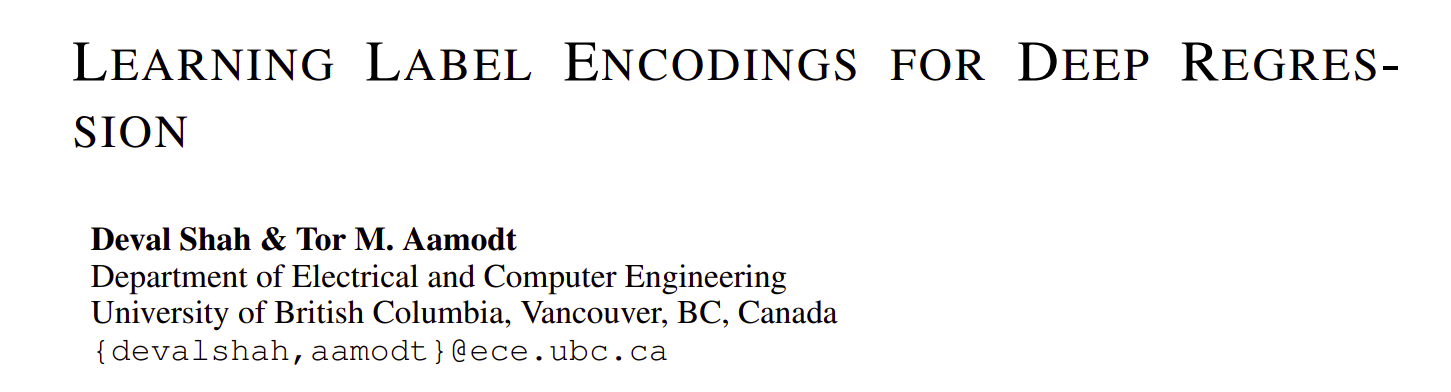

# **Further Coding examples**  



1.   [Preprocessing Encoding Categorical Data
](https://www.kaggle.com/code/ohseokkim/preprocessing-encoding-categorical-data?utm_source=chatgpt.com)
2.   [11 Categorical Encoders and Benchmark
](https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark?utm_source=chatgpt.com)


